Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.inspection import permutation_importance # computing feature importance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import missingno as msno



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

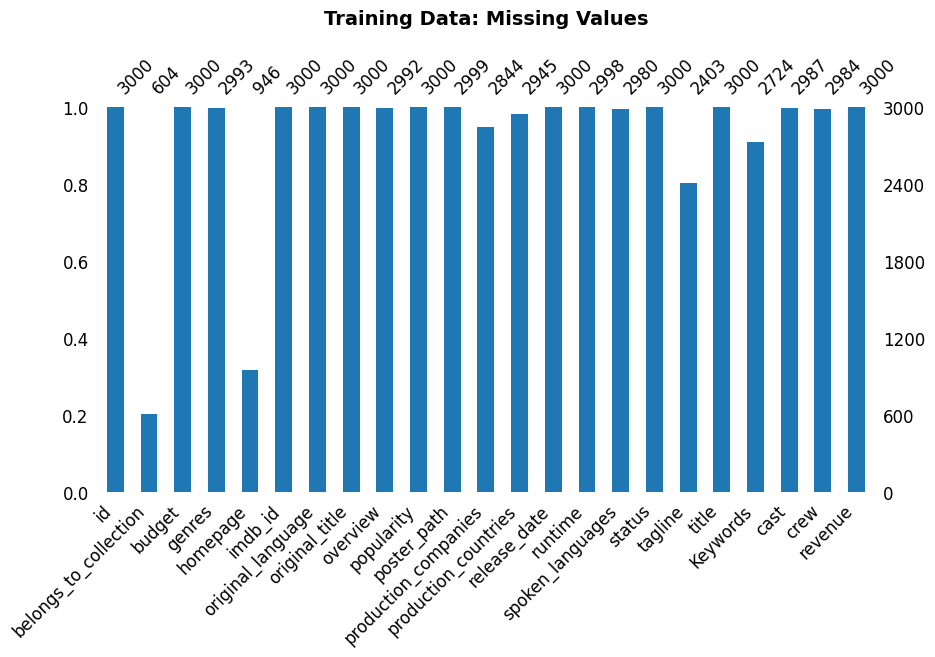

In [ ]:
train_miss = msno.bar(train, figsize=(10,5), fontsize=12, color= 'C0').set_title('Training Data: Missing Values' '\n',
                                                                                 fontweight="bold", fontsize=14)

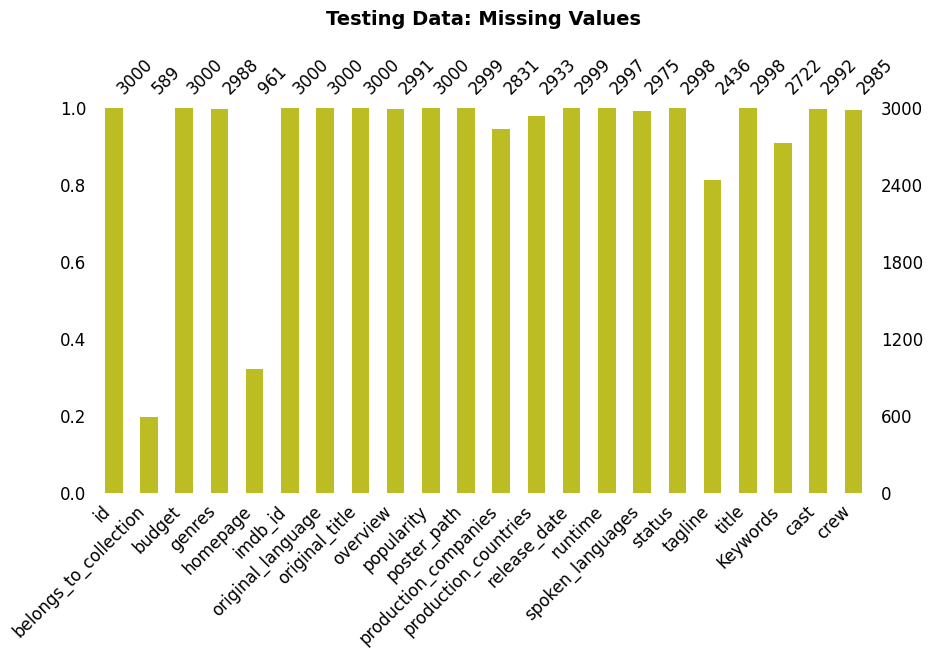

In [ ]:
test_miss = msno.bar(test, figsize=(10,5), fontsize=12, color= 'C8').set_title('Testing Data: Missing Values' '\n', fontweight="bold", fontsize=14)


In [ ]:
test[test["release_date"].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,NaN,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN


In [ ]:
# Addin the release date 05/01/2020, which I found through a quick online search
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
test[test["release_date"]== '5/1/00']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,NaN,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN


In [ ]:
# For nominal data, replacing the missing values with "none"

train[['genres',
       'original_language',
       'spoken_languages',
       'status',
       'production_countries',
       'production_companies',
       'cast',
       'crew']] = train[['genres',
         'original_language',
         'spoken_languages',
         'status',
         'production_countries',
         'production_companies',
         'cast',
         'crew']].fillna("none")

test[['genres',
       'original_language',
       'spoken_languages',
       'status',
       'production_countries',
       'production_companies',
       'cast',
       'crew']] = test[['genres',
         'original_language',
         'spoken_languages',
         'status',
         'production_countries',
         'production_companies',
         'cast',
         'crew']].fillna("none")

In [ ]:
# For numerical data, replacing the missing values with the mean
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())
train['runtime'].isnull().any()

False

2. Formatting the dates

In [ ]:
# Converting the format of the date and creating new year, day, and month columns

train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

In [ ]:
# Since this competition was in 2019, there shouldn't be a release that after 2019
train['release_year'].max()

2073

eda

<Axes: >

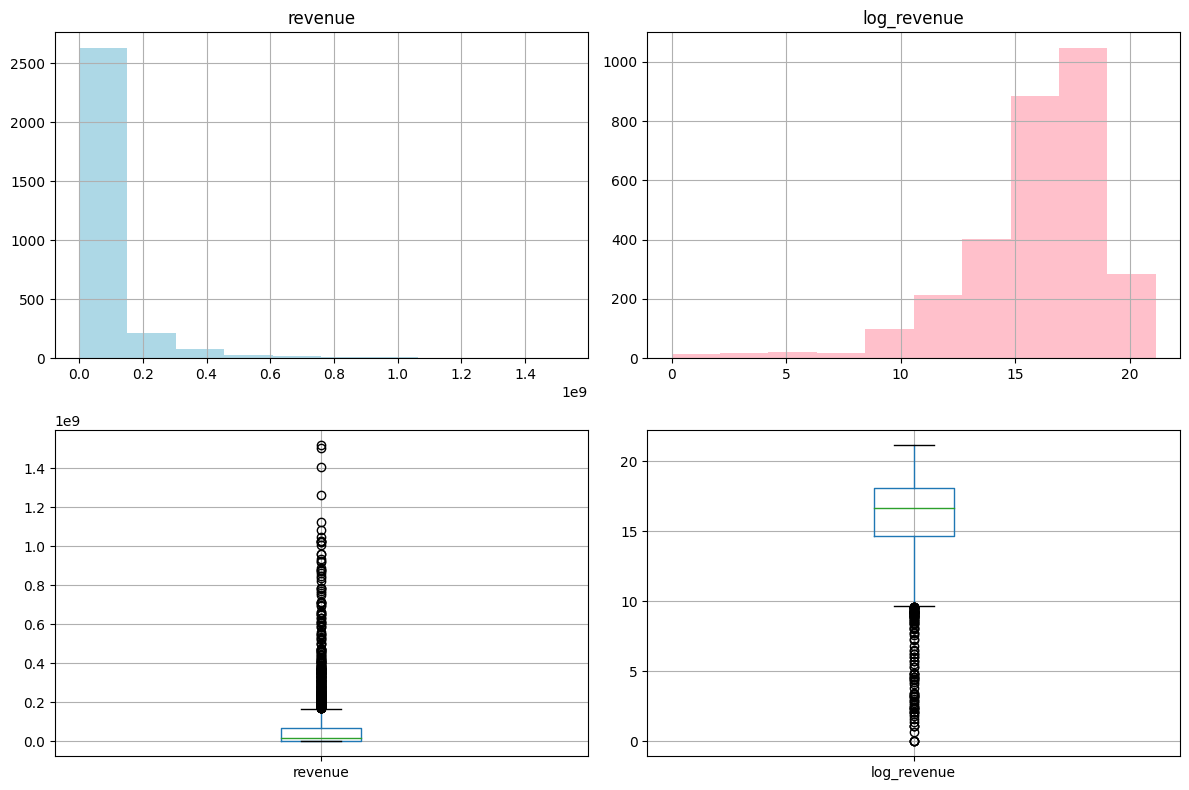

In [ ]:
# Univariate Analysis: Revenue
train['log_revenue'] = np.log(train['revenue'])

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
train.hist(column= ["revenue"], ax=ax[0][0], color='lightblue')
train.hist(column= ['log_revenue'], ax=ax[0][1], color='pink')
train.boxplot(column= ["revenue"], ax=ax[1][0])
train.boxplot(column= ['log_revenue'], ax=ax[1][1])

<Axes: >

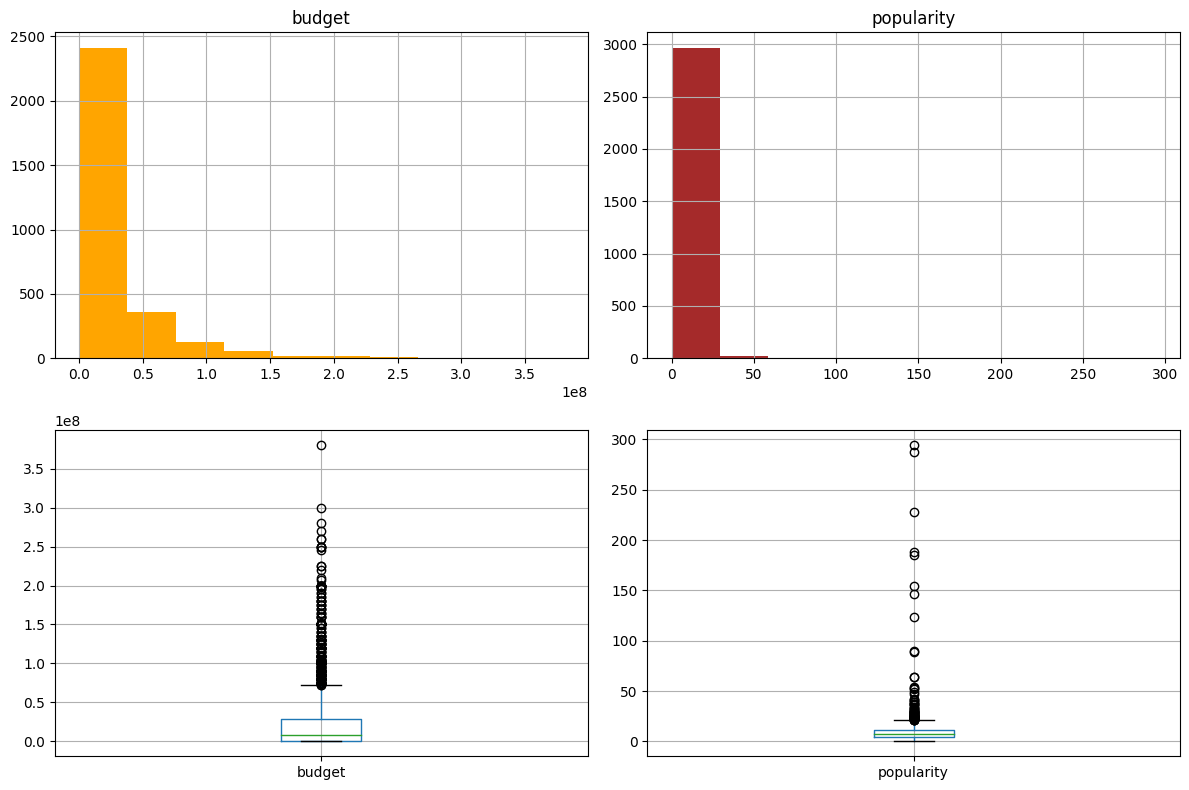

In [ ]:
# Univariate Analysis: Budget & Popularity

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
train.hist(column= ["budget"], ax=ax[0][0], color='orange')
train.hist(column= ['popularity'], ax=ax[0][1], color='brown')
train.boxplot(column= ['budget'], ax=ax[1][0])
train.boxplot(column= ['popularity'], ax=ax[1][1])

<Axes: >

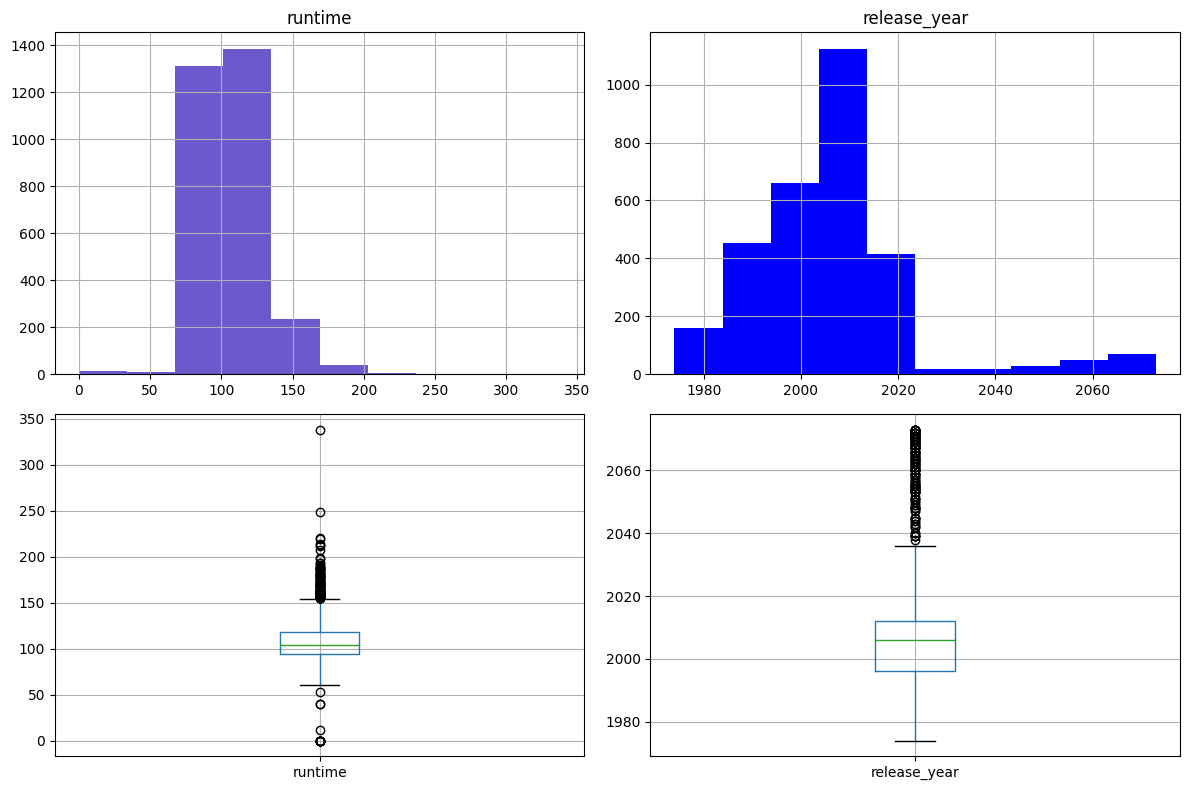

In [ ]:
# Univariate Analysis: Runtime & Release Year

fig, ax = plt.subplots(2, 2, figsize = (12, 8), tight_layout=True)
train.hist(column= ["runtime"], ax=ax[0][0], color='slateblue')
train.hist(column= ['release_year'], ax=ax[0][1], color='blue')
train.boxplot(column= ['runtime'], ax=ax[1][0])
train.boxplot(column= ['release_year'], ax=ax[1][1])

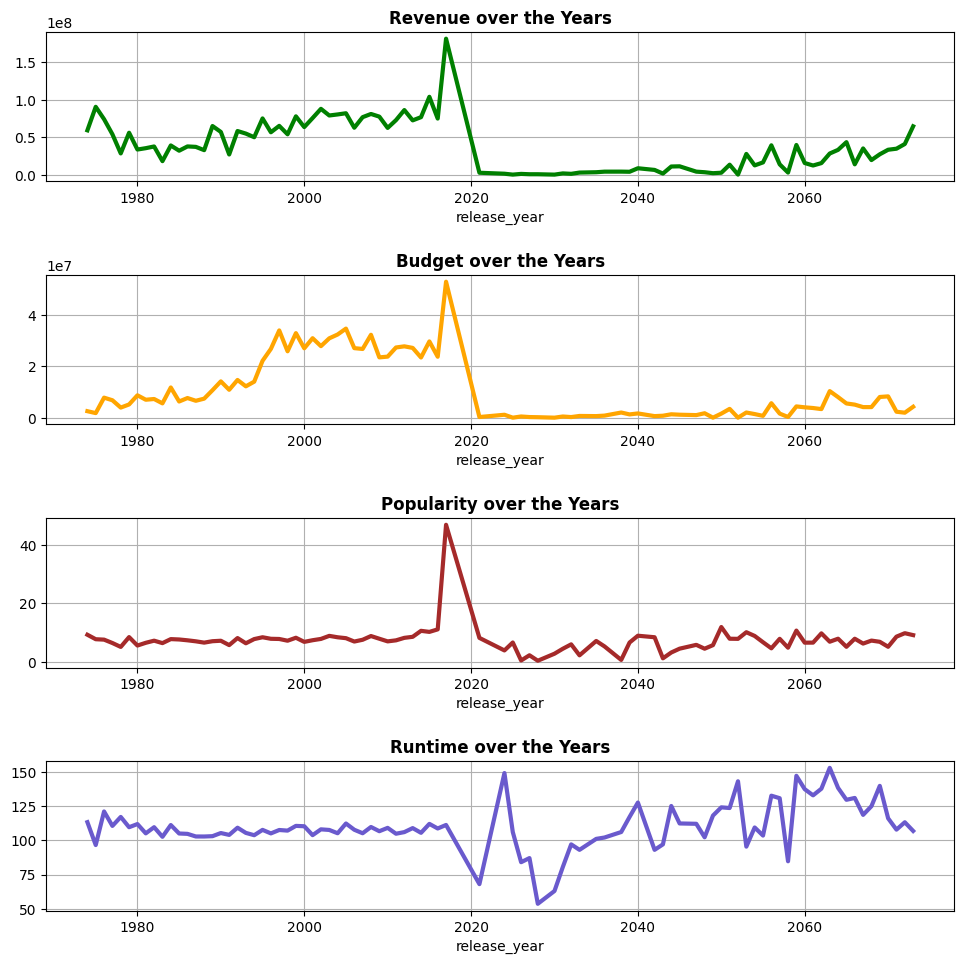

In [ ]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

train.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

train.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

train.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

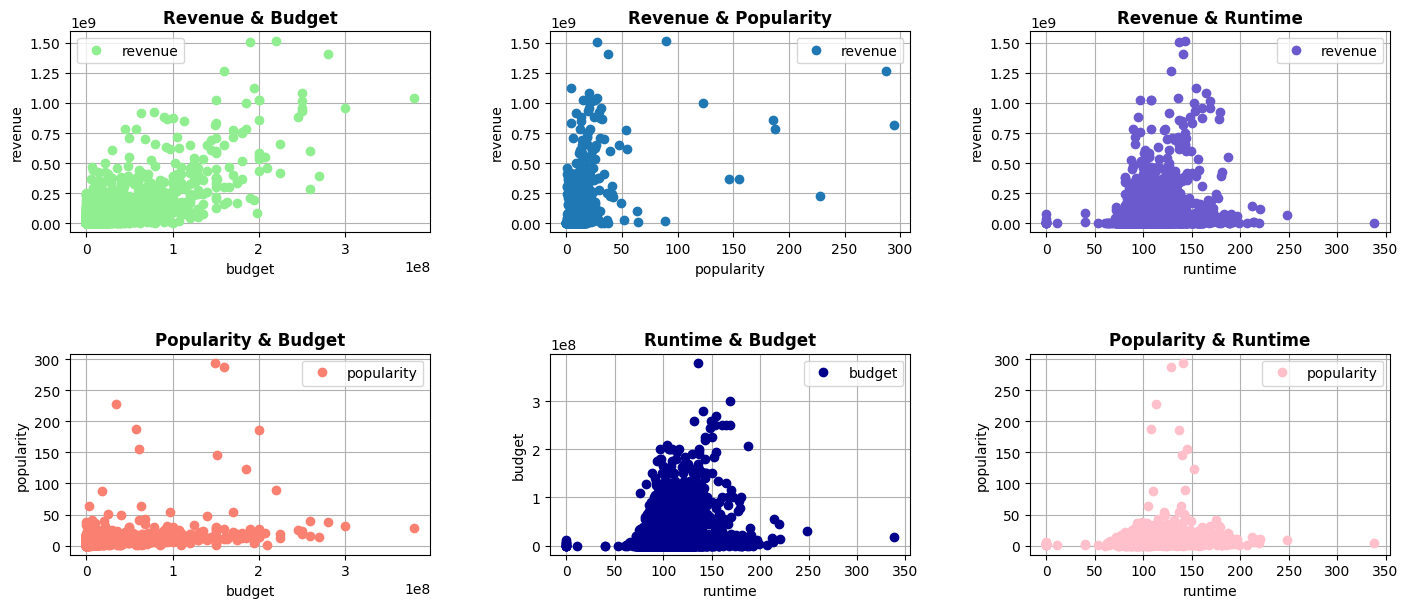

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

train.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='lightgreen').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

train.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

train.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

train.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

train.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

train.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='pink').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

Statical analysis of dataset

In [ ]:
# Descriptive statistics
print(train.describe())

                id        budget   popularity      runtime       revenue  \
count  3000.000000  3.000000e+03  3000.000000  3000.000000  3.000000e+03   
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07   
std     866.169729  3.702609e+07    12.104000    22.079069  1.375323e+08   
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00   
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06   
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07   
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07   
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09   

       release_year  release_day  release_month  log_revenue  
count   3000.000000  3000.000000    3000.000000  3000.000000  
mean    2005.879667     3.247333       6.775333    15.959894  
std       16.765188     1.332949       3.409115     3.071323  
min     1974.000000     0.000000       1.000000     0.000000  


<ipython-input-23-c55e51bb532f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


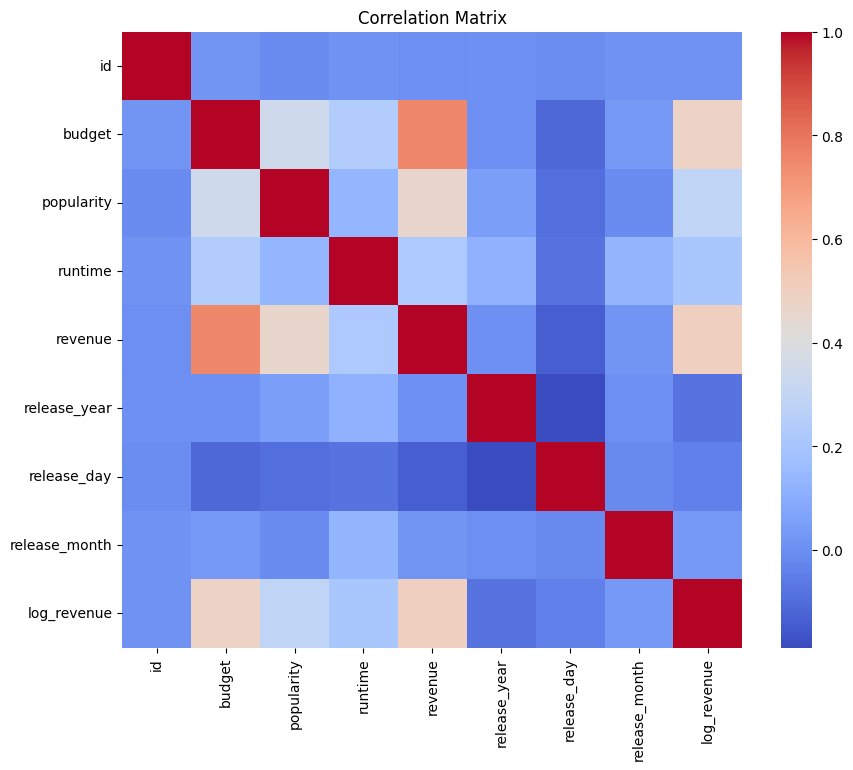

In [ ]:
# Correlation analysis
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)  # Remove annotations for simplicity
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Hypothesis testing (Example: t-test)
from scipy.stats import ttest_ind
group1 = train[train['original_language'] == 'English']['revenue']
group2 = train[train['original_language'] != 'English']['revenue']
t_stat, p_value = ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: nan
P-value: nan


Text(0.5, 1.0, 'Distribution of Revenue')

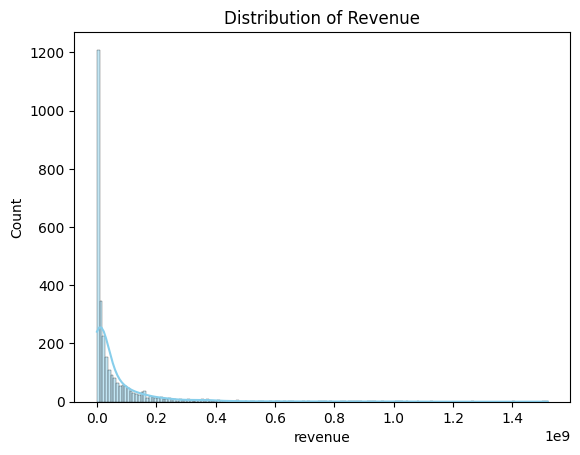

In [ ]:
# Distribution analysis
sns.histplot(train['revenue'], kde=True, color='skyblue')
plt.title('Distribution of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

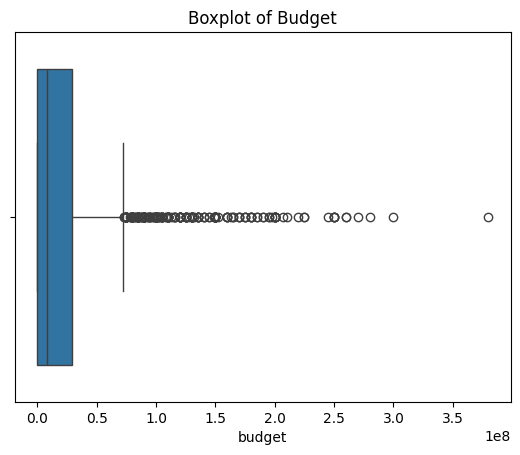

In [ ]:
# Outlier detection
sns.boxplot(x=train['budget'])
plt.title('Boxplot of Budget')

4. Feature Engineering

In [ ]:
# Many features are in json format.
for e in enumerate(test['genres'][:10]):
    print(e)

(0, "[{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]")
(1, "[{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]")
(2, "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]")
(3, "[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'name': 'War'}, {'id': 9648, 'name': 'Mystery'}]")
(4, "[{'id': 36, 'name': 'History'}, {'id': 99, 'name': 'Documentary'}]")
(5, "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]")
(6, "[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]")
(7, "[{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}]")
(8, "[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]")
(9, "[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]")


In [ ]:
# First, I am converting the features in Json format to nominal format
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [ ]:
train.genres = train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.cast = train.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
train.crew = train.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

test.genres = test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.spoken_languages = test.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.cast = test.cast.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test.crew = test.crew.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

train.crew.head()

0    Adam Blum,Allison Gordin,Andrew Panay,Annabell...
1    Bruce Green,Charles Minsky,Debra Martin Chase,...
2    Alicia Hadaway,Andy Ross,Barbara Harris,Ben Wi...
3                  Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh
4                        Jong-seok Yoon,Jong-seok Yoon
Name: crew, dtype: object

In [ ]:
# Then, I am counting the occurances in those features
# which I plan to use in the model, unless they are not redundant.
# For instance, one might expect higher revenue from a movie
# if that movie was produced in several spoken languages and/or had a more crowded crew.

train['genres_count'] = train['genres'].str.count(',') + 1
train['spoken_languages_count'] = train['spoken_languages'].str.count(',') + 1
train['cast_count'] = train['cast'].str.count(',') + 1
train['crew_count'] = train['crew'].str.count(',') + 1

test['genres_count'] = test['genres'].str.count(',') + 1
test['spoken_languages_count'] = test['spoken_languages'].str.count(',') + 1
test['cast_count'] = test['cast'].str.count(',') + 1
test['crew_count'] = test['crew'].str.count(',') + 1
test['genres_count']

0       4
1       2
2       2
3       3
4       2
       ..
2995    3
2996    4
2997    3
2998    1
2999    2
Name: genres_count, Length: 3000, dtype: int64

In [ ]:
# Converting nominal data to numberical data
train[['status',
      'original_language',
      'production_companies',
      'production_countries']] = train[['status',
               'original_language',
               'production_companies',
               'production_countries']].astype('category')

train['status'] = train['status'].cat.codes
train['original_language'] = train['original_language'].cat.codes
train['production_companies'] = train['production_companies'].cat.codes
train['production_countries'] = train['production_countries'].cat.codes

test[['status',
      'original_language',
      'production_companies',
      'production_countries']] = test[['status',
               'original_language',
               'production_companies',
               'production_countries']].astype('category')

test['status'] = test['status'].cat.codes
test['original_language'] = test['original_language'].cat.codes
test['production_companies'] = test['production_companies'].cat.codes
test['production_countries'] = test['production_countries'].cat.codes

train['production_countries']

0       316
1       316
2       316
3       210
4       236
       ... 
2995    316
2996    111
2997    316
2998    316
2999    316
Name: production_countries, Length: 3000, dtype: int16

In [ ]:
# Budget has zero values for many movies including some high budget movies.
# Additionally, it does not make sense to have movies with 0 runtimes.
# I am imputing those zero values with mean.
train['budget'] = train['budget'].replace(0, train['budget'].mean())
train['runtime'] = train['runtime'].replace(0, train['runtime'].mean())

test['budget'] = test['budget'].replace(0, test['budget'].mean())
test['runtime'] = test['runtime'].replace(0, test['runtime'].mean())

In [ ]:
# Assigning the data corresponding to the target and predictor variables
y = train['log_revenue']
X = train.drop(['log_revenue', 'revenue'], axis=1)

In [ ]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [ ]:
 #Creating the list of features
feature_names = ['release_year', 'release_day', 'release_month', 'status', 'original_language',
                 'budget', 'popularity', 'genres_count', 'production_companies', 'production_countries',
                'spoken_languages_count', 'cast_count', 'crew_count', 'runtime']

# Assigning the data corresponding to features in feature_names
X_train_full = X_train_full[feature_names]

X_valid_full = X_valid_full[feature_names]

X_train_full.head()

,release_year,release_day,release_month,status,original_language,budget,popularity,genres_count,production_companies,production_countries,spoken_languages_count,cast_count,crew_count,runtime
2370,2012,1,3,0,7,150000000.0,7.739904,1,1012,121,1,18,31,99.0
1774,2001,4,10,0,7,35000000.0,7.790140,3,1997,80,3,26,65,122.0
731,2067,6,12,0,7,4000000.0,5.032469,3,1712,316,1,18,25,108.0
271,2006,4,8,0,7,72500000.0,6.936688,1,385,316,1,24,14,116.0
1077,1980,4,8,0,7,20000000.0,3.782547,3,2168,316,1,19,15,96.0


5. Random Forest Model

In [ ]:
# Defining the Random Forest Model
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model
rf_model.fit(X_train_full, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# Prediction
y_pred_rf = rf_model.predict(X_valid_full)

In [ ]:
# Calculate MAE
mae_rf = mean_absolute_error(y_pred_rf, y_valid)

print("Mean Absolute Error RF:" , mae_rf)

Mean Absolute Error RF: 1.418223817080765


<Axes: >

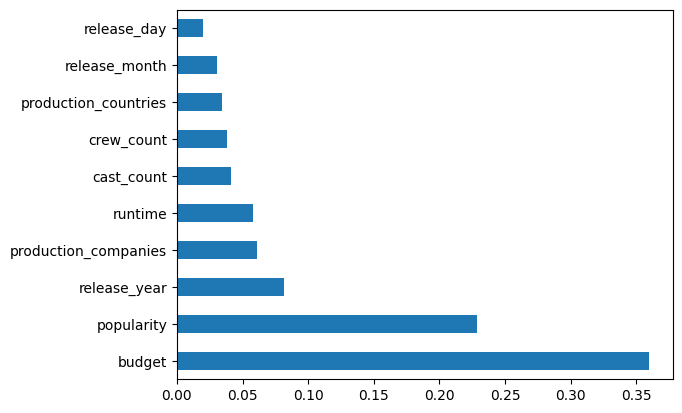

In [ ]:
# Calculating feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

6. XGBoost Model

In [ ]:
# Define the model
xgb_model = XGBRegressor() # Your code here

# Fit the model
xgb_model.fit(X_train_full, y_train) # Your code here

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediction
y_pred_xgb = xgb_model.predict(X_valid_full)

In [ ]:
# Calculate MAE
mae_xgb = mean_absolute_error(y_pred_xgb, y_valid)

print("Mean Absolute Error XGBOOST:" , mae_xgb)

Mean Absolute Error XGBOOST: 1.465860306740241


<Axes: >

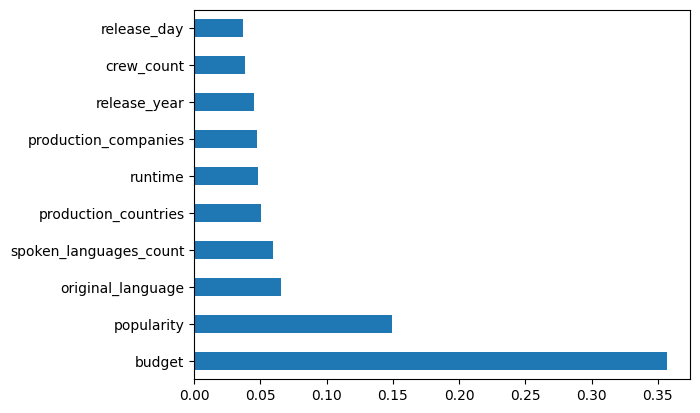

In [ ]:
# Calculating feature importance for the XGBoost Model
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train_full.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.svm import SVR


In [ ]:
# SVM Model
svm_model = SVR(kernel='rbf')  # You can choose different kernels based on your preference

# Fit the model
svm_model.fit(X_train_full, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_valid_full)

# Calculate MAE
mae_svm = mean_absolute_error(y_pred_svm, y_valid)

print("Mean Absolute Error SVM:", mae_svm)


Mean Absolute Error SVM: 1.7559196697123385


7. Final Model

In [ ]:
# Based on the MAE results, the Random Forest Model is given better results than the XGBoost Model does.
# Therefore, the final model is defined using RF

X = train[feature_names]
X_test = test[feature_names]

In [ ]:
# Defining the Final Model
final_model = RandomForestRegressor(random_state=1)

# Fitting the model
final_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [ ]:
# Prediction
y_pred_final = final_model.predict(X_test)
pred = pd.DataFrame(y_pred_final)

In [ ]:
submission = test[['id']].copy()
submission['revenue'] = pred
submission.to_csv('submission_1.csv', index=False)


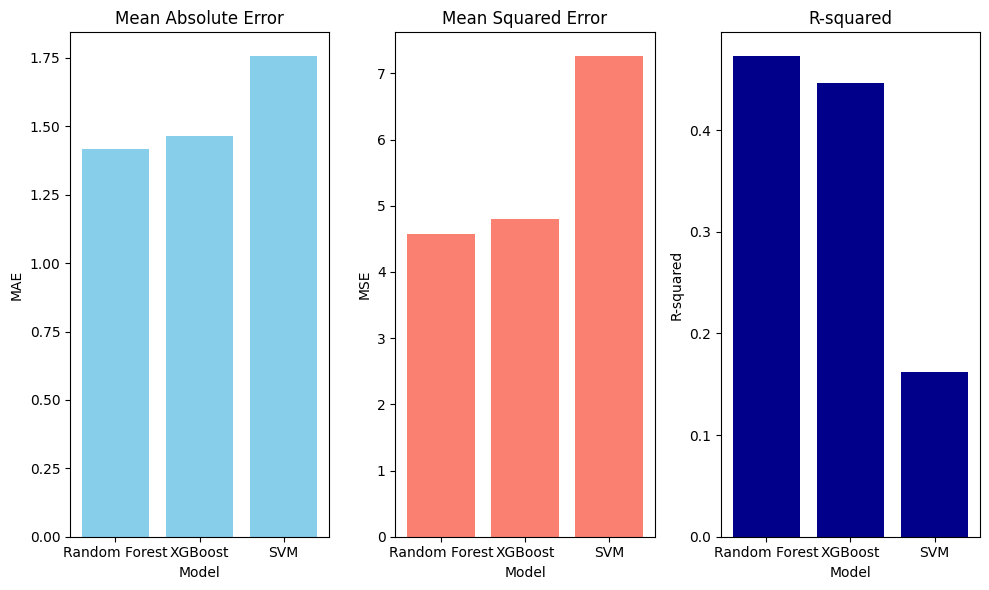

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics for each ML model
evaluation_metrics = {}

# For Random Forest Model
y_pred_rf = rf_model.predict(X_valid_full)
mae_rf = mean_absolute_error(y_valid, y_pred_rf)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)

evaluation_metrics['Random Forest'] = {'MAE': mae_rf, 'MSE': mse_rf, 'R-squared': r2_rf}

# For XGBoost Model
y_pred_xgb = xgb_model.predict(X_valid_full)
mae_xgb = mean_absolute_error(y_valid, y_pred_xgb)
mse_xgb = mean_squared_error(y_valid, y_pred_xgb)
r2_xgb = r2_score(y_valid, y_pred_xgb)

evaluation_metrics['XGBoost'] = {'MAE': mae_xgb, 'MSE': mse_xgb, 'R-squared': r2_xgb}

# For SVM Model
y_pred_svm = svm_model.predict(X_valid_full)
mae_svm = mean_absolute_error(y_valid, y_pred_svm)
mse_svm = mean_squared_error(y_valid, y_pred_svm)
r2_svm = r2_score(y_valid, y_pred_svm)

evaluation_metrics['SVM'] = {'MAE': mae_svm, 'MSE': mse_svm, 'R-squared': r2_svm}

# Visualize the results
# Create lists of metrics for each model
model_names = list(evaluation_metrics.keys())
mae_values = [evaluation_metrics[model]['MAE'] for model in model_names]
mse_values = [evaluation_metrics[model]['MSE'] for model in model_names]
r2_values = [evaluation_metrics[model]['R-squared'] for model in model_names]

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(model_names, mae_values, color='skyblue')
plt.title('Mean Absolute Error')
plt.xlabel('Model')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(model_names, mse_values, color='salmon')
plt.title('Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.bar(model_names, r2_values, color='darkblue')
plt.title('R-squared')
plt.xlabel('Model')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have predictions for each model: y_pred_rf, y_pred_xgb, y_pred_svm
# And actual values for validation: y_valid

# Calculate MSE for each model
mse_rf = mean_squared_error(y_valid, y_pred_rf)
mse_xgb = mean_squared_error(y_valid, y_pred_xgb)
mse_svm = mean_squared_error(y_valid, y_pred_svm)

# Calculate R2 for each model
r2_rf = r2_score(y_valid, y_pred_rf)
r2_xgb = r2_score(y_valid, y_pred_xgb)
r2_svm = r2_score(y_valid, y_pred_svm)

# Print MSE for each model
print("Mean Squared Error for Random Forest:", mse_rf)
print("Mean Squared Error for XGBoost:", mse_xgb)
print("Mean Squared Error for SVM:", mse_svm)

# Print R2 for each model
print("\nR-squared for Random Forest:", r2_rf)
print("R-squared for XGBoost:", r2_xgb)
print("R-squared for SVM:", r2_svm)


Mean Squared Error for Random Forest: 4.569879018136001
Mean Squared Error for XGBoost: 4.793721819381448
Mean Squared Error for SVM: 7.258381967422898

R-squared for Random Forest: 0.4727053067584499
R-squared for XGBoost: 0.446877244188603
R-squared for SVM: 0.1624928629941349
